### Imports

In [67]:
import sys
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import TwitchGraphs
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

# Configuração de estilo dos gráficos
TwitchGraphs.setup_style()

In [68]:
# Alterar o país para analisar
country = 'FR'

## Visualizar os novos Dados

### Guardar os dados em um dicionário

In [69]:
# Criar um dicionário para armazenar os dataframes
dfs = {}

# Carregar dados para cada país
for country1 in countries:
    file_path = base_dir / 'data' / country1 / f'Raw_musae_{country1}_target.csv'
    dfs[country1] = pd.read_csv(file_path)

In [70]:
countryData = dfs[country]
print(countryData)

markdown_conteudo = f"# Análise da Região {country}"
# Em vez de criar os gráficos diretamente, usar as funções do TwitchGraphs
output_dir = base_dir / 'docs' / "Imagens"

             id  days  mature  views  partner  new_id           username  \
0     150417538   577    True    775    False    4867  Gwencatgirldotexe   
1     125723704   861    True   2585    False    3692          Playonasm   
2     155971814   523   False   1566    False    3816             Melt0n   
3      35832890  2234   False   9713    False     416        PilouCrapou   
4      46787750  1896    True  44529    False    4502         Hecthelion   
...         ...   ...     ...    ...      ...     ...                ...   
6550   29196284  2061   False   3822    False    6546          Sadallica   
6551  124327806   880    True  30313    False    2392            Kha_LeN   
6552  144229380   640    True   5022    False     391            hoxalik   
6553  131423064   736   False   2658    False    2793            lotfi32   
6554   45419243  1929    True   3743    False    1092           aconit10   

      created_at                                        profile_pic  \
0     2017-03-14

In [71]:
display(Markdown(markdown_conteudo))

# Análise da Região FR

In [72]:
print(f"\n=== Análise para {country} ===")

# Tipos de dados
print("\nTipos de dados:")
print(countryData.dtypes)



=== Análise para FR ===

Tipos de dados:
id                   int64
days                 int64
mature                bool
views                int64
partner               bool
new_id               int64
username            object
created_at          object
profile_pic         object
broadcaster_type    object
game_name           object
dtype: object


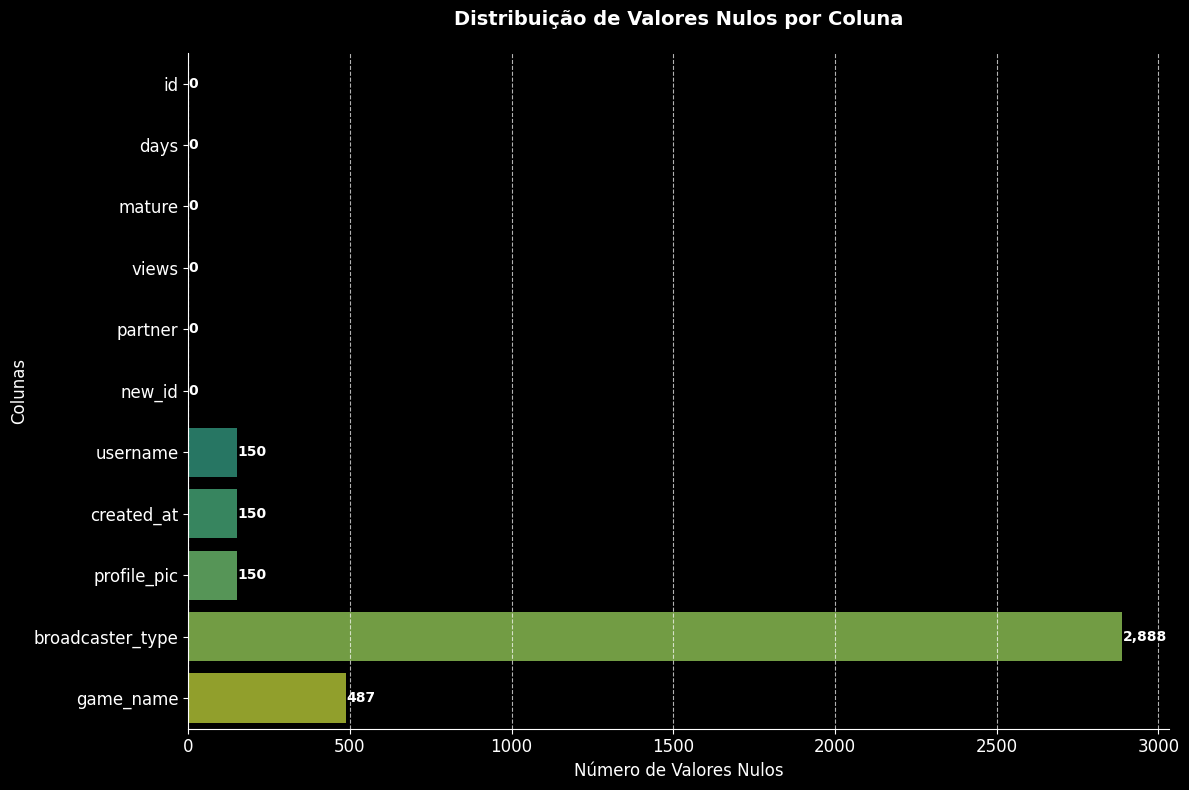

In [73]:
TwitchGraphs.plot_null_distribution(countryData, country, output_dir)

In [74]:
# Remover nulos
# Guardar o número de linhas original
linhas_originais = len(countryData)

# Remover apenas linhas com username nulo
df_clean = countryData.dropna(subset=['username'])
df_clean = df_clean.copy()
df_clean.loc[:, 'broadcaster_type'] = df_clean['broadcaster_type'].fillna('non_partner')

# Mostrar informação sobre as linhas removidas
linhas_removidas = linhas_originais - len(df_clean)
print(f"Linhas originais: {linhas_originais}")
print(f"Linhas removidas: {linhas_removidas}")
print(f"Linhas após remover nulos em username: {len(df_clean)}")
print(f"Percentagem de dados mantidos: {(len(df_clean)/linhas_originais)*100:.2f}%")

Linhas originais: 6555
Linhas removidas: 150
Linhas após remover nulos em username: 6405
Percentagem de dados mantidos: 97.71%


broadcaster_type
affiliate      3166
non_partner    2738
partner         501
Name: count, dtype: int64


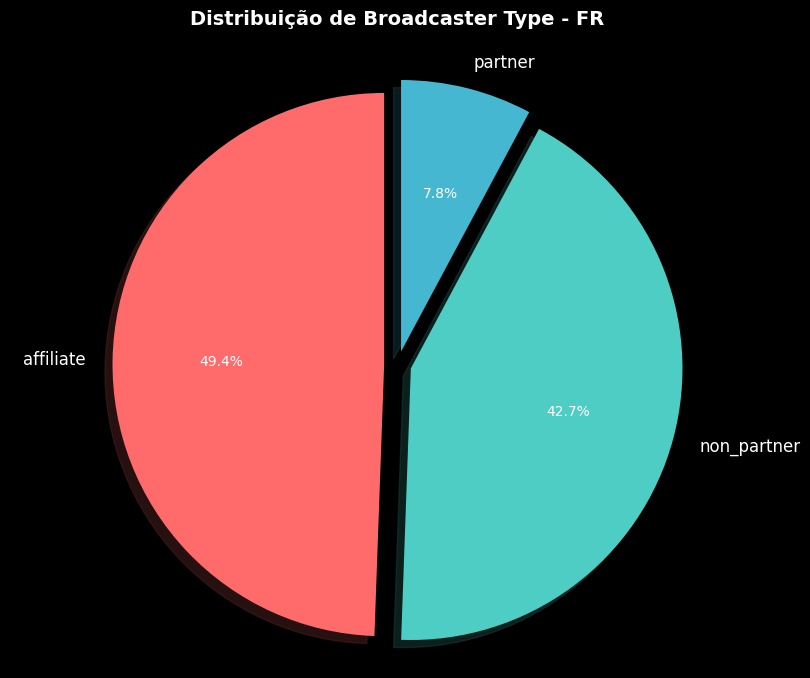

In [75]:
TwitchGraphs.plot_broadcaster_distribution(df_clean, country, output_dir)

mature
False    4033
True     2372
Name: count, dtype: int64


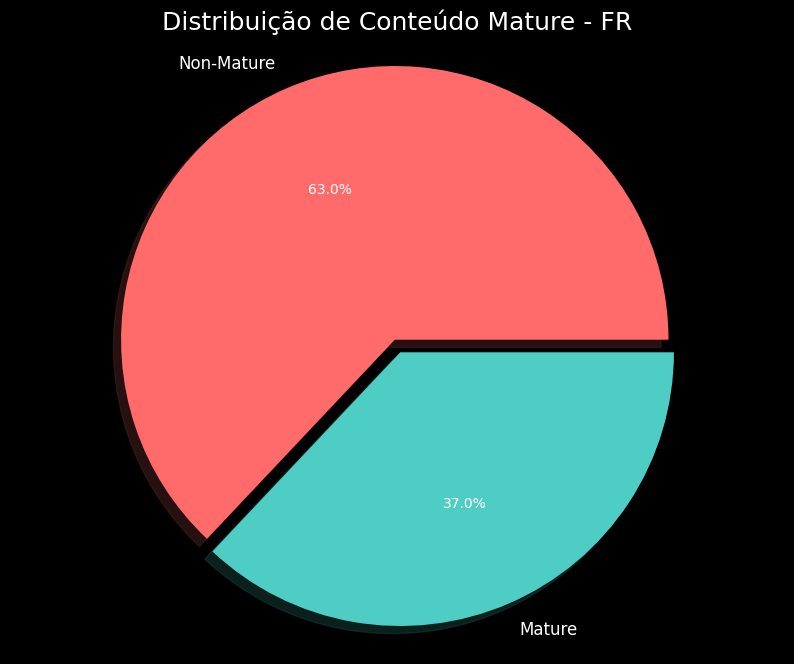

In [76]:
# Usar as funções do TwitchGraphs para criar os gráficos
TwitchGraphs.plot_mature_content(df_clean, country, output_dir)

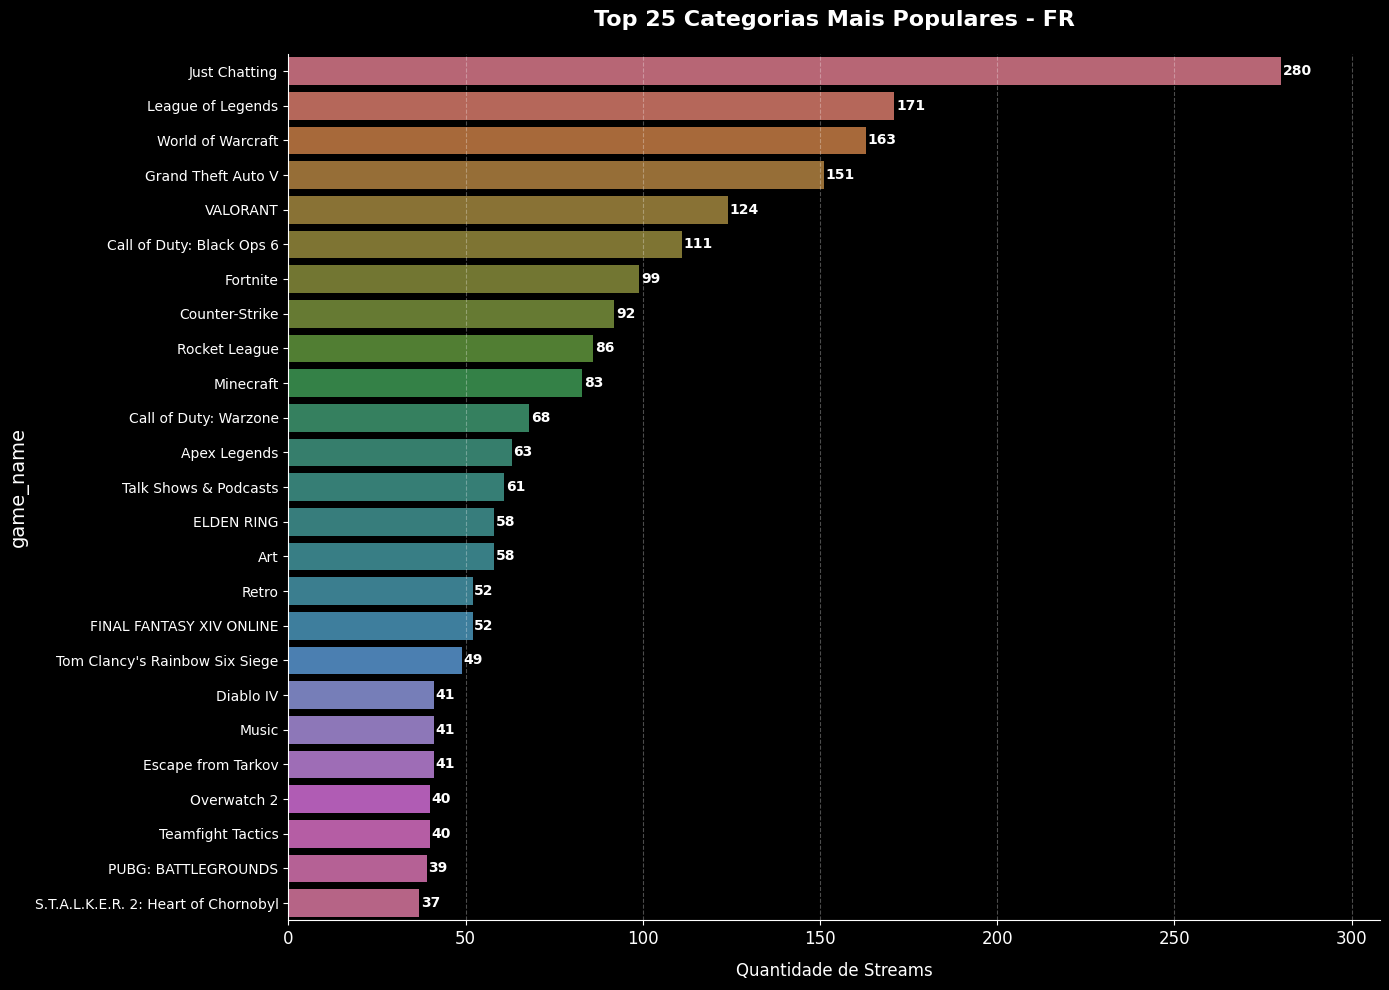

In [77]:
TwitchGraphs.plot_game_categories(df_clean, country, output_dir)

In [78]:
# Salvar o DataFrame limpo
file_path = base_dir / 'data' / country / f'Final_musae_{country}_target.csv'
df_clean.to_csv(file_path, index=False)
print(f"Dados salvos em: {file_path}")

Dados salvos em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\data\FR\Final_musae_FR_target.csv


## Eliminar ligações inúteis

In [79]:
# Carregar o arquivo de edges
edge_path = base_dir / 'data' / country / f'musae_{country}_edges.csv'
edges_df = pd.read_csv(edge_path)

print("Número de edges antes da filtragem:", len(edges_df))

# Converter os IDs para o mesmo tipo (int64)
edges_df['from'] = edges_df['from'].astype('int64')
edges_df['to'] = edges_df['to'].astype('int64')
df_clean['new_id'] = df_clean['new_id'].astype('int64')

# Criar um conjunto com os IDs válidos do df_clean
valid_ids = set(df_clean['new_id'].values)

# Filtrar as edges para manter apenas aquelas onde ambos os nós existem em valid_ids
filtered_edges = edges_df[
    edges_df['from'].isin(valid_ids) & 
    edges_df['to'].isin(valid_ids)
]

print("Número de edges após a filtragem:", len(filtered_edges))

# Salvar o novo arquivo de edges filtrado
filtered_edge_path = base_dir / 'data' / country / f'Final_musae_{country}_edges.csv'
filtered_edges.to_csv(filtered_edge_path, index=False)
print(f"Edges filtradas salvas em: {filtered_edge_path}")

# Mostrar algumas estatísticas
print("\nEstatísticas:")
print(f"Edges removidas: {len(edges_df) - len(filtered_edges)}")
print(f"Porcentagem de edges mantidas: {(len(filtered_edges)/len(edges_df))*100:.2f}%")

Número de edges antes da filtragem: 112666
Número de edges após a filtragem: 108604
Edges filtradas salvas em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\data\FR\Final_musae_FR_edges.csv

Estatísticas:
Edges removidas: 4062
Porcentagem de edges mantidas: 96.39%
